### Detail
- paper [here](http://ydwen.github.io/papers/WenECCV16.pdf)
- not just separate but discriminate 
- softmax loss = cross entrophy
- dataset MegaFace also [Labeled Faces in the Wild (LFW), and YouTube Faces (YTF)]
- use 5 landmarks (two eyes, nose and mouth corners) for similarity transformation by this [algorithm](https://arxiv.org/pdf/1604.02878.pdf)
- cropped to 112 × 96

TODO
- pretrain with softmax loss
- MTCNN to face align
- freeze/unfreeze
- 

In [43]:
import torch
t = torch.tensor([[10,20],
                  [30,40]])
torch.gather(t, 0, torch.tensor([[0, 0],
                                 [1, 1]]))

tensor([[10, 20],
        [30, 40]])

In [39]:
import numpy as np
np.unique(np.array([1,2,3,1,2,2]), return_inverse=True, return_counts=True)

(array([1, 2, 3]), array([0, 1, 2, 0, 1, 1]), array([2, 3, 1]))

In [57]:
from torchvision import transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from exitai.learner import Learner

In [60]:
transform_train = transforms.Compose([
                                   transforms.RandomAffine(15, scale=(.9,1.2)),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5,), (1,))
                               ])
transform_test = transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5,), (1,))
                               ])
dataset_train = datasets.MNIST(root='../../data/', train=True, download=True, transform=transform_train)
dataset_test = datasets.MNIST(root='../../data/', train=True, download=True, transform=transform_train)
data_loader_train = DataLoader(dataset_train, batch_size=128, shuffle=True, num_workers=8)
data_loader_test = DataLoader(dataset_test, batch_size=128, shuffle=True, num_workers=8)

In [54]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 20, 5, 1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(20, 50, 5, 1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
        )
        self.fc = nn.Sequential(
            nn.Linear(4*4*50, 500),
            nn.Linear(500, 10)
        )
        self.is_classification = True
        
    def forward(self, x):
        output = self.cnn(x)
        output = output.view(-1, 50*4*4)
        output = self.fc(output)
        return output
    
    def name(self):
        return "LeNet"

In [69]:
criterion = nn.CrossEntropyLoss()
def model_loss_func(input_data, model, phase):
    input, target = input_data
    output = model(input)
    return output, criterion(output, target)

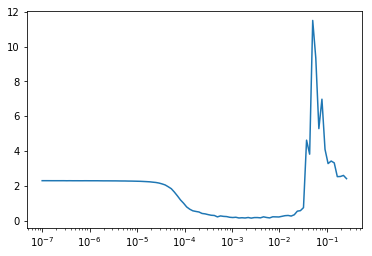

In [74]:
model = LeNet()

learner = Learner(data_loader_train, data_loader_test, model)
learner.lr_find(model_loss_func, 1e-7, 0.3)

In [75]:
learner.fit(model_loss_func, 0.002, num_epochs=100)

---- epoch:0 ------
   [train] Average loss: 1.8061, acc: 10.33%
   [test] Average loss: 1.7996, acc: 11.24%
---- epoch:1 ------
   [train] Average loss: 1.7996, acc: 11.08%
   [test] Average loss: 1.7988, acc: 11.24%
---- epoch:2 ------
   [train] Average loss: 1.8102, acc: 10.12%
   [test] Average loss: 1.8022, acc: 10.22%
---- epoch:3 ------


Traceback (most recent call last):
  File "/Users/epinyoanun/miniconda3/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/Users/epinyoanun/miniconda3/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/epinyoanun/miniconda3/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Users/epinyoanun/miniconda3/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/epinyoanun/miniconda3/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/Users/epinyoanun/miniconda3/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File

KeyboardInterrupt: 